#  4个 KM
(1) pandas KM
(2) correlation KM
(3) numpy KM
(4) numpy BiKM

# Pandas 数据类型版KM

In [ ]:
# coding: utf-8
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import numpy
import pandas
import pandas as pd


def get_data(paths):
    data = []
    with open(paths,'r') as f:
        fr = f.readlines()
        for line in fr:
            line = line.strip().split('\t')
            temp = [float(i) for i in line]
            data.append(temp)   
    return mat(data)

def cal_dist(centers,data,k):
    data= mat(data)
    m,n = data.shape
    dists = zeros((m,k))
    for j in range(k):
        for i in range(m):
            dists[i,j] = sqrt(sum(pow((centers-data[i]).A,2)))
    return dists

def chose_center(data,k):
    ids = []
    m,n = data.shape
    indexs =list(arange(m))
    for i in range(k):
        NL = len(indexs)
        index = random.randint(0,NL,1)[0]  # 这个地方需要注意啊 ，
        ids.append(indexs[index])
        indexs.remove(indexs[index])
    centers = data[ids]
    return centers

class km:
    def __init__(self, data, k, iters, early_stop=True):
        self.data = data
        self.k = k 
        self.iters = iters
        self.N,_ = data.shape
        self.early_stop = early_stop
        self.init_center = self.chose_center(k, data) #这里的 self.chose_center 的 self
        self.centers, self.class_label, self.total_dist, self.dist, self.rate = self.km_model(data,k,iters,early_stop)
        
    def chose_center(self,k,data):
        ids = []
        indexs =list(np.arange(N))
        for i in range(k):
            NL = len(indexs)
            index = random.randint(0,NL,1)[0]  # 这个地方需要注意啊 ，
            ids.append(indexs[index])
            indexs.remove(indexs[index])
        centers = data[ids]
        return centers
    
    def km_model(self,data,k,iters,early_stop):
        centers= self.chose_center(k,data) 
        total_dist = np.zeros((iters,1))
        rate = []
        
        for j in range(iters):
            dist=[]
            for i in range(k):
                dist.append(np.sqrt(diag(np.matmul((centers[i]-data),(centers[i]-data).T))))  # np.sqrt(np.sum((x[0]-x[2])**2)) 计算的另外一种方法。

            dist = np.transpose(dist)
            class_label = np.argmin(dist,1)

            for i in range(k):
                pos = class_label==i
                centers[i] = np.mean(x[pos],0) 
                total_dist[j] += np.sum(np.sum(dist[pos,i],0))
            
            if j>0 and j<iters:
                re = (total_dist[j-1]-total_dist[j])/total_dist[j]
                rate.append(re)
                
                if early_stop and re<0.01:
                    break
                    
        return centers, class_label, total_dist, dist,rate
""" 
    def plot(self,data,k,iters,early_stop):
        centers,class_label,*_ = self.km_model(data,k,iters,early_stop)
        fig = plt.subplot(1,1,1)
        for i in range(k):
            pos = class_label==i
            fig.scatter(x[pos,0],x[pos,1])
            fig.scatter(centers[i,0],centers[i,1],color='r',marker='*',linewidths=10)
		plt.show()
"""		
		

# 相关系数作为 距离的KM

In [ ]:
class km_evo:
    def __init__(self,data,k,iters,method="kendall"):
        self.data = data
        self.k = k 
        self.iters = iters
        self.N,_ = data.shape
        self.method=method
        self.centers,self.class_label,self.total_dist= self.km_model(data,k,iters)


    def chose_random_k(self,k,data):
        ids = []
        indexs = list(np.arange(self.N))
        for i in range(k):
            NL = len(indexs)
            index = random.randint(0,NL,1)[0]  # 这个地方需要注意啊 ，
            ids.append(indexs[index])
            indexs.remove(indexs[index])
        return ids

    def km_model(self,data,k,iters):
        ids = self.chose_random_k(k,data) # 随机选择K
        
        data = data.T
        
        if isinstance(data,numpy.ndarray):
            data = pd.DataFrame(data)
        elif isinstance(data,pandas.core.frame.DataFrame):
            pass
        else:
            raise KeyError("The data is not fit for this model")
        
        dist = np.array(data.corr(method=self.method))      
        total_dist =  np.zeros((iters,1))
        centers = dist[ids]
        class_label = np.argmax(centers,0)
                 
        for j in range(iters):
            new_centers = []   
            for i in range(k):
                pos = class_label==i
                new_dist = dist[:,pos]
                new_index = np.argmax(sum(new_dist,1))            
                new_centers.append(dist[new_index])      
                max_dist = np.max(sum(new_dist,1))              
                total_dist[j] +=max_dist
            centers = new_centers
            class_label =  np.argmax(centers,0)
              
        return centers,class_label,total_dist        
        
    def plot(self,data,k,iters):
        centers,class_label,*_ = self.km_model(data,k,iters)
        fig = plt.subplot(1,1,1)
        for i in range(k):
            pos = class_label==i
            fig.scatter(x[pos,0],x[pos,1])
            fig.scatter(centers[i,0],centers[i,1],color='r',marker='*',linewidths=10)
        plt.show()

# KM20181209

In [1]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

data = load_iris()["data"]

In [2]:
def dist_eduli(vec1, vec2):
    diff = np.sum(np.power(vec1 - vec2, 2), axis=-1)
    return np.sqrt(diff)

def get_random(k, m):
    index = set()
    while len(index)!=k:
        temp = np.random.randint(m)
        index.add(temp)
    return list(index)

def updata(data, centers, m, mats, k):
    for i in range(m):
        temp_dist = dist_eduli(data[i], centers)
        cent = np.argmin(temp_dist)
        mats[i, 0] = cent
        mats[i, 1] = temp_dist[cent]
    for i in range(k):
        means = np.mean(data[mats[:,0]==i], axis=0)
        centers[i] = means
    sse = np.sum(mats[:,1])
    return mats, centers, sse

def km(data_train, k=3, iters=20, error=0.01):
    m, n = data_train.shape
    center_index = get_random(k, m)
    centers = data_train[center_index]
    mats = np.zeros((m, 2))
    sse_old = np.inf
    
    for i in range(iters):
        mats, centers, sse = updata(data_train, centers, m, mats, k)
        if (sse_old - sse) > error:
            sseold = sse
        else:
            break
    return mats, centers, sse 

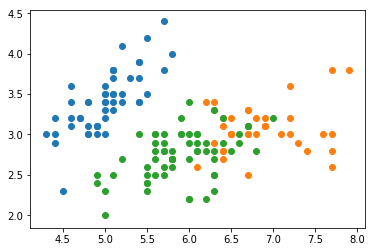

In [19]:
mats, centers, sse = km(data, k=3)
for i in range(3):
    plt.scatter(data[mats[:,0]==i, 0], data[mats[:, 0]==i, 1])

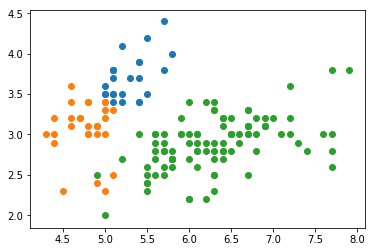

In [205]:
class km:
    def __init__(self, iters, error=0.01)->"迭代计算的终止条件":
        self.iters = iters
        self.error = error
    
    def dist_eduli(self, vec1, vec2)->"真是目的，计算向量与 矩阵的距离":
        diff = np.sum(np.power(vec1 - vec2, 2), axis=-1)
        return np.sqrt(diff)

    def get_random(self, k, m)->"初始的中心点选择":
        index = set()
        while len(index)!=k:
            temp = np.random.randint(m)
            index.add(temp)
        return list(index)
    
    def updata(self, data, centers, m, mats, k):
        for i in range(m):
            temp_dist = self.dist_eduli(data[i], centers)
            # 求一个点 到中心的距离，得到该点的 类别归属。
            cent = np.argmin(temp_dist)
            mats[i, 0] = cent
            mats[i, 1] = temp_dist[cent]

        for i in range(k):
            means = np.mean(data[mats[:,0]==i], axis=0)
            centers[i] = means
        sse = np.sum(mats[:,1])
        return mats, centers, sse

    def __call__(self, data, k):
        if isinstance(data, list):
            data = np.array(data)
        elif isinstance(data, np.ndarray):
            pass
        else:
            raise TypeError("The type of data must be numpy.ndarray, but {} find".format(type(data)))
        
        m, n = data.shape
        center_index = self.get_random(k, m)
        self.centers = data[center_index]
        self.mats = np.zeros((m, 2))
        self.sse_old = np.inf
        
        for i in range(self.iters):
            self.mats, self.centers, self.sse = self.updata(data, self.centers, m, self.mats, k)
            if (self.sse_old - self.sse) > self.error:
                self.sseold = self.sse
            else:
                break
        return self.mats, self.centers, self.sse 
        
    @property
    def get_mats(self):
        return self.mats
    
    @property
    def get_centers(self):
        return self.centers
    

kmmodel = km(20)
mats, centers, sse = kmmodel(np.matrix(data), 3)
for i in range(3):
    plt.scatter(data[mats[:,0]==i, 0], data[mats[:, 0]==i, 1])

In [4]:
model.get_centers

matrix([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
        [5.006     , 3.418     , 1.464     , 0.244     ],
        [6.85      , 3.07368421, 5.74210526, 2.07105263]])

#  20181210 BiKM

In [229]:
def dist_eduli(vec1, vec2):
    diff = np.sum(np.power(vec1 - vec2, 2), axis=-1)
    return np.sqrt(diff)

def BiKM(data, k, KMk=2):
    m, n = data.shape
    mats_total = np.zeros((m, 2))
    index = np.random.randint(0, m)
    center_all = [data[index]]
    mats_total[:,1] = dist_eduli(center_all, data)
    sse_total = np.sum(mats_total[:, 1])
    best_split = 0

    while len(center_all) < k:
        for i in range(len(center_all)):
            temp_data = data[mats_total[:,0] == i]
            sse_qt = np.sum(mats_total[mats_total[:,0] != i, 1])
            mats, centers, sse = kmmodel(temp_data, KMk)  # 调用KModel
            # 满足条件 则更新。
            if sse + sse_qt < sse_total:
                sse_total = sse + sse_qt
                best_split = i
                print("best_split :{}, sse_total: {}".format(best_split, sse_total))
                # 中心点的更新，将第一个中心赋值到 best_split, 第二个追加到列表上。 顺序不重要
                center_all[best_split] = centers[0]
                center_all.append(centers[1])
                # 更新顺损失 矩阵。
                mats[mats[:,0] != 0, 0] = len(center_all) - 1
                mats[mats[:,0] == 0, 0] = best_split
                mats_total[mats_total[:,0] == best_split, :] = mats
    return mats_total, center_all, sse_total
            
ks = 3
mats_totals, center_alls, sse_totals = BiKM(data, ks)

best_split :0, sse_total: 128.40419523672944
best_split :0, sse_total: 122.08705888359998
best_split :1, sse_total: 92.77185384091368


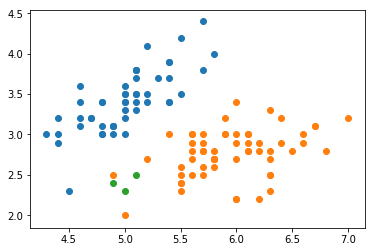

In [230]:
for i in range(ks):
    plt.scatter(data[mats_totals[:,0]==i, 0], data[mats_totals[:, 0]==i, 1])